<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">EDA And Prediction - Titanic</p>
<br />

<p>Author: Muhammad Shafa Praramadhana</p>

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Import Library</p>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings

warnings.filterwarnings('ignore')

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Import Dataset</p>

In [ ]:
df = pd.read_csv('train_titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**About the dataset**
<br />
* PassengerId: unique id number to each passenger
*Survived: passenger survive(1) or died(0)
*Pclass: passenger class
*Name: name
*Sex: gender of passenger
*Age: age of passenger
*SibSp: number of siblings/spouses
*Parch: number of parents/children
*Ticket: ticket number
*Fare: amount of money spent on ticket
*Cabin: cabin category
*Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Exploratory Data Analysis</p>

In [ ]:
# Check for null values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that Age, Cabin and Embarked variables contain null values.

Text(0.5, 1.0, 'Value distribution on Survived variable')

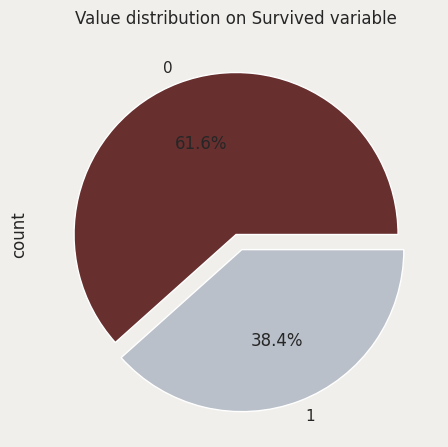

In [ ]:
# Plotting Survived variable value distribution
import seaborn as sns
import matplotlib.style as style

sns.set(rc = {'axes.facecolor': '#f0efeb', 'figure.facecolor': '#f0efeb', 'figure.figsize':(5, 5)})

palette = ["#682F2F","#B9C0C9", "#9F8A78", "#F3AB60"]

df['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', colors = palette)
plt.title('Value distribution on Survived variable')

Text(0.5, 1.0, 'Value distribution on Survived variable')

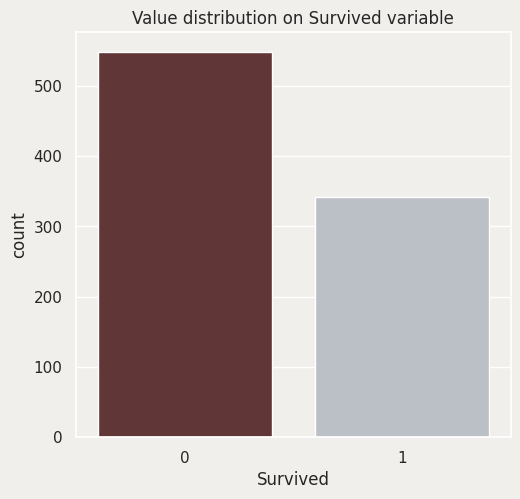

In [ ]:
pl = sns.countplot(x = df['Survived'], palette = palette)

plt.title('Value distribution on Survived variable')

From the above plot, we can see that not many passengers were survived the accident.

<br />

Only about 38.4% or 350 passengers of the total training set survived the accident. Let's dig down to gain a better insight from the data and see which categoriesof the passengers that survived.

<br />

I will try to check the survival rate by using the different features of the dataset.

**Exploring the Sex variable**

In [ ]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

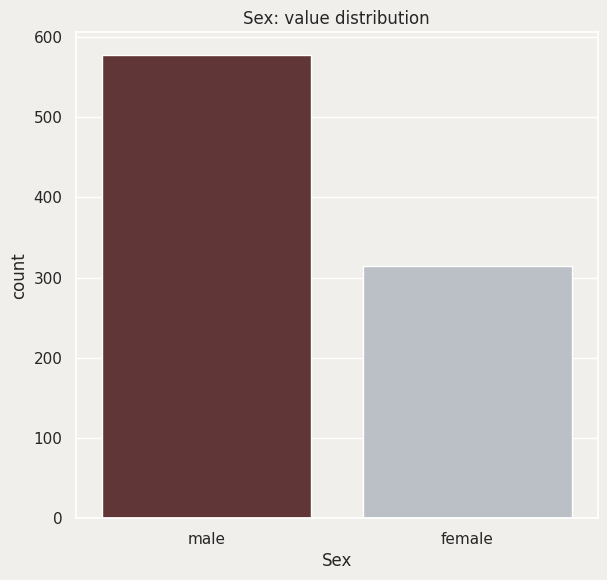

In [ ]:
plt.figure(figsize = (6, 6))

sns.countplot(x = df['Sex'], palette = palette)

plt.title('Sex: value distribution')
plt.show()

The number of male passenger is almost twice from the number of female passenger.

In [ ]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [ ]:
pd.crosstab(df.Sex, df.Survived, margins = True).style.background_gradient(axis = 0)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


<Figure size 600x600 with 0 Axes>

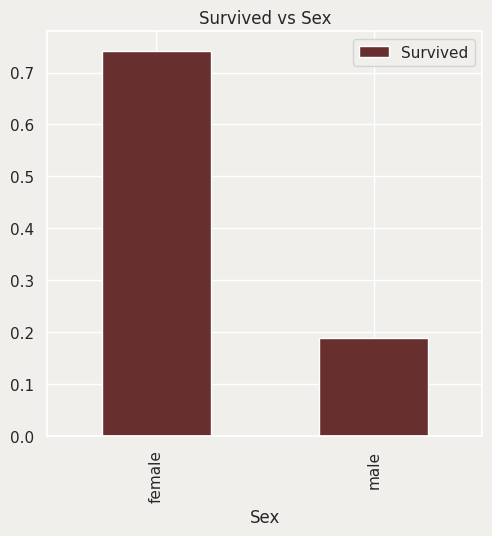

In [ ]:
plt.figure(figsize = (6, 6))

df[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(color = palette)

plt.title('Survived vs Sex')
plt.show()

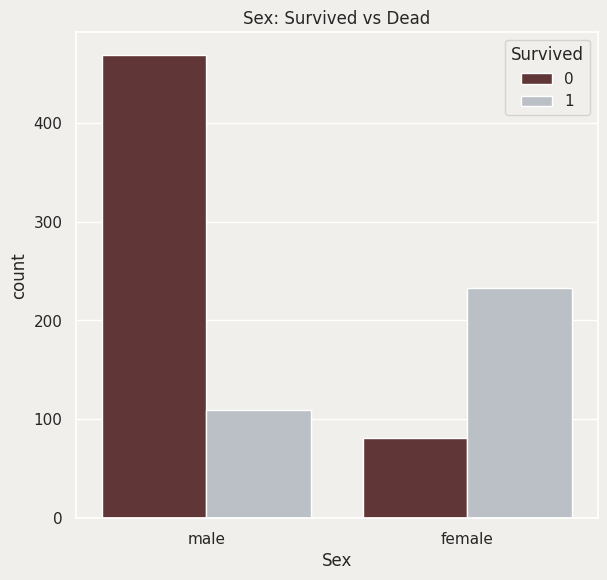

In [ ]:
plt.figure(figsize = (6, 6))

sns.countplot(x = df['Sex'], hue = df['Survived'], palette = palette)

plt.title('Sex: Survived vs Dead')
plt.show()

The plot above shows a really interesting results. We know that the number of men on the ship is lot more than the number of women. But the number of women survived from the accident is almost twice the number of males saved. The survival rates for a woman on the ship is around 75% while that for a men is around 18-19%.

**Exploring the Pclass variable**

In [ ]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

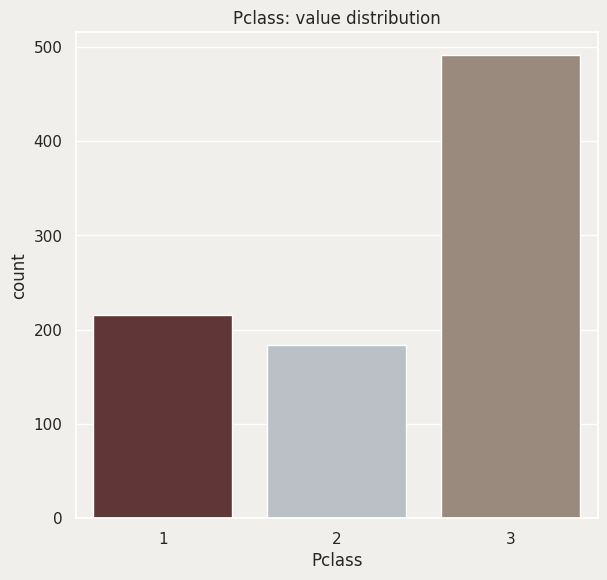

In [ ]:
plt.figure(figsize = (6, 6))

sns.countplot(x = df['Pclass'], palette = palette)

plt.title('Pclass: value distribution')
plt.show()

We can see that most of the passengers is from the Pclass 3

In [ ]:
df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [ ]:
pd.crosstab(df.Pclass, df.Survived, margins = True).style.background_gradient(axis = 0)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Figure size 600x600 with 0 Axes>

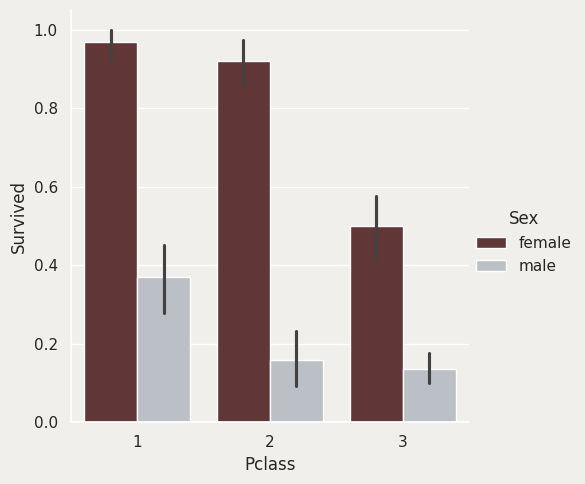

In [ ]:
plt.figure(figsize = (6, 6))

sns.catplot(x = 'Pclass', y = 'Survived', data = df, hue = 'Sex', kind = 'bar', palette = palette)

plt.show()

<Figure size 600x600 with 0 Axes>

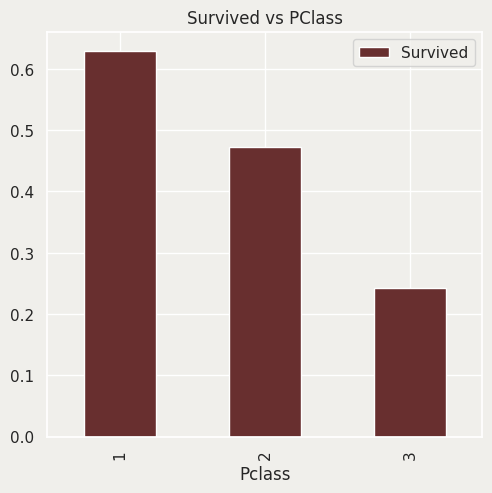

In [ ]:
plt.figure(figsize = (6, 6))

df[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar(color = palette)

plt.title('Survived vs PClass')
plt.show()

Text(0.5, 1.0, 'Pclass: Survived vs Dead')

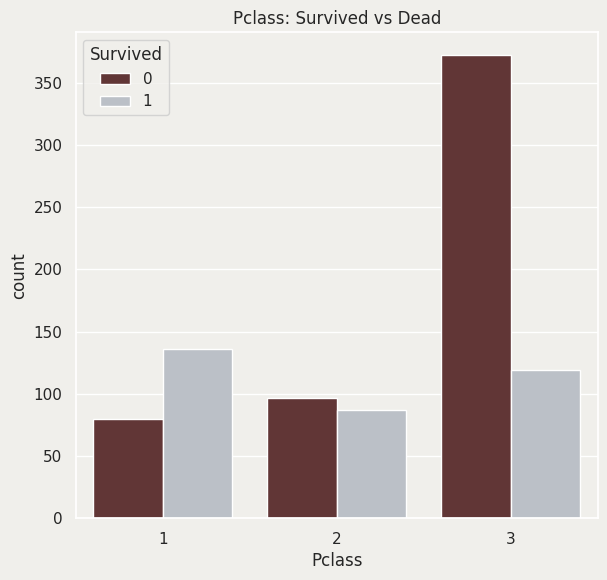

In [ ]:
plt.figure(figsize = (6, 6))

sns.countplot(x = df['Pclass'], hue = df['Survived'], palette = palette)
plt.title('Pclass: Survived vs Dead')

From the above plot, we can clearly see that passengers of Pclass 1 were given a very high priority while rescue. Even though the number of passenger in Pclass 3 is a lot higher, but still the number of survival is very low.

<br />

* Survived passenger from Pclass 1: around 63%
* Survived passenger from Pclass 2: around 48%
* Survived passenger from Pclass 3: around 24%

<br />

So money and status does matters in this **materialistic** world, pathetic.

**Checking the survival rate with Sex and Pclass variable**

In [ ]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins = True).style.background_gradient(axis = 0)

Looking at the crosstab above, we can easily see that survival for female from Pclass 1 is very high, about 95-96%, as only 3 female died from Pclass1 out of 94.

<br />

We can also see that survival for male from Pclass 1 is so low, far below 50%. So female were given first priority while rescue.

**Exploring the Age variable**

In [ ]:
print('The oldest passenger in the ship: ', df['Age'].max())
print('The youngest passenger in the ship: ', df['Age'].min())
print('Average age of the passenger in the ship: ', df['Age'].mean())

The oldest passenger in the ship:  80.0
The youngest passenger in the ship:  0.42
Average age of the passenger in the ship:  29.69911764705882


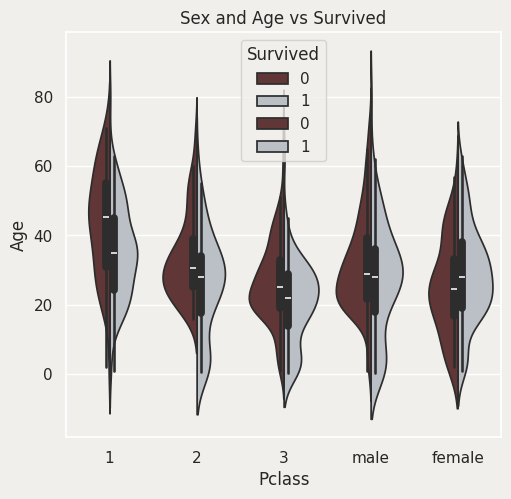

In [ ]:
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = df, split = True, palette = palette)
plt.title('Pclass and Age vs Survived')

sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = df, split = True, palette = palette)
plt.title('Sex and Age vs Survived')

plt.show()

* The number of children (passenger below 10 years old) that survived looks good irrespective of the Pclass
* The survival rate for passenger age 20-50 is high in Pclass 1, especially for women
* The survival chance for male is decreased with an increased of age

As we seen earlier, we got 177 null values in the Age variable. Commonly null values in numeric columns will be replaced by the mean or the mode, which is going to be a problem.

<br />

We cant just assign 29, which is the average of the Age column to each 177 null values.

<br />

The solution is to check the Name variable. Looking upon the feature, we can see that the names have a salutation like 'Mr' or 'Mrs'. Then we can assign the mean value of the respective group.

**Exploring the Name variable**

In [ ]:
df['Initial'] = 0

for i in df:
  df['Initial'] = df.Name.str.extract('([A-Za-z]+)\.')

The regex '([A-Za-z]+)\.', it looks for string that lies between A-Z or a-z and followed by .(dot)

In [ ]:
df['Initial'].value_counts()

Initial
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [ ]:
pd.crosstab(df.Sex, df.Initial).style.background_gradient(axis = 0)

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Lets replace some mispelled initials, llike Mlle and Mme that stand for miss.

In [ ]:
df['Initial'].replace({'Mlle': 'Miss', 'Mme': 'Miss',
                       'Ms': 'Miss', 'Dr': 'Mr',
                       'Major': 'Mr', 'Lady': 'Mrs',
                       'Countess': 'Mrs', 'Jonkheer': 'Other',
                       'Col': 'Other', 'Rev': 'Other', 'Capt': 'Mr',
                       'Sir': 'Mr', 'Don': 'Mr'}, inplace = True)

In [ ]:
df['Initial'].value_counts()

Initial
Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: count, dtype: int64

In [ ]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
# Assigning the null values with ceil of mean values of each initial group
df.loc[(df.Age.isnull()) & (df.Initial == 'Mr'), 'Age'] = 33
df.loc[(df.Age.isnull()) & (df.Initial == 'Mrs'), 'Age'] = 36
df.loc[(df.Age.isnull()) & (df.Initial == 'Miss'), 'Age'] = 22
df.loc[(df.Age.isnull()) & (df.Initial == 'Master'), 'Age'] = 5
df.loc[(df.Age.isnull()) & (df.Initial == 'Other'), 'Age'] = 43

In [ ]:
df.Age.isnull().sum()

0

We can see that theres no null value left in the Age column

([<matplotlib.axis.XTick at 0x7ec0ea50ee90>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(55, 0, '55'),
  Text(60, 0, '60'),
  Text(65, 0, '65'),
  Text(70, 0, '70'),
  Text(75, 0, '75'),
  Text(80, 0, '80')])

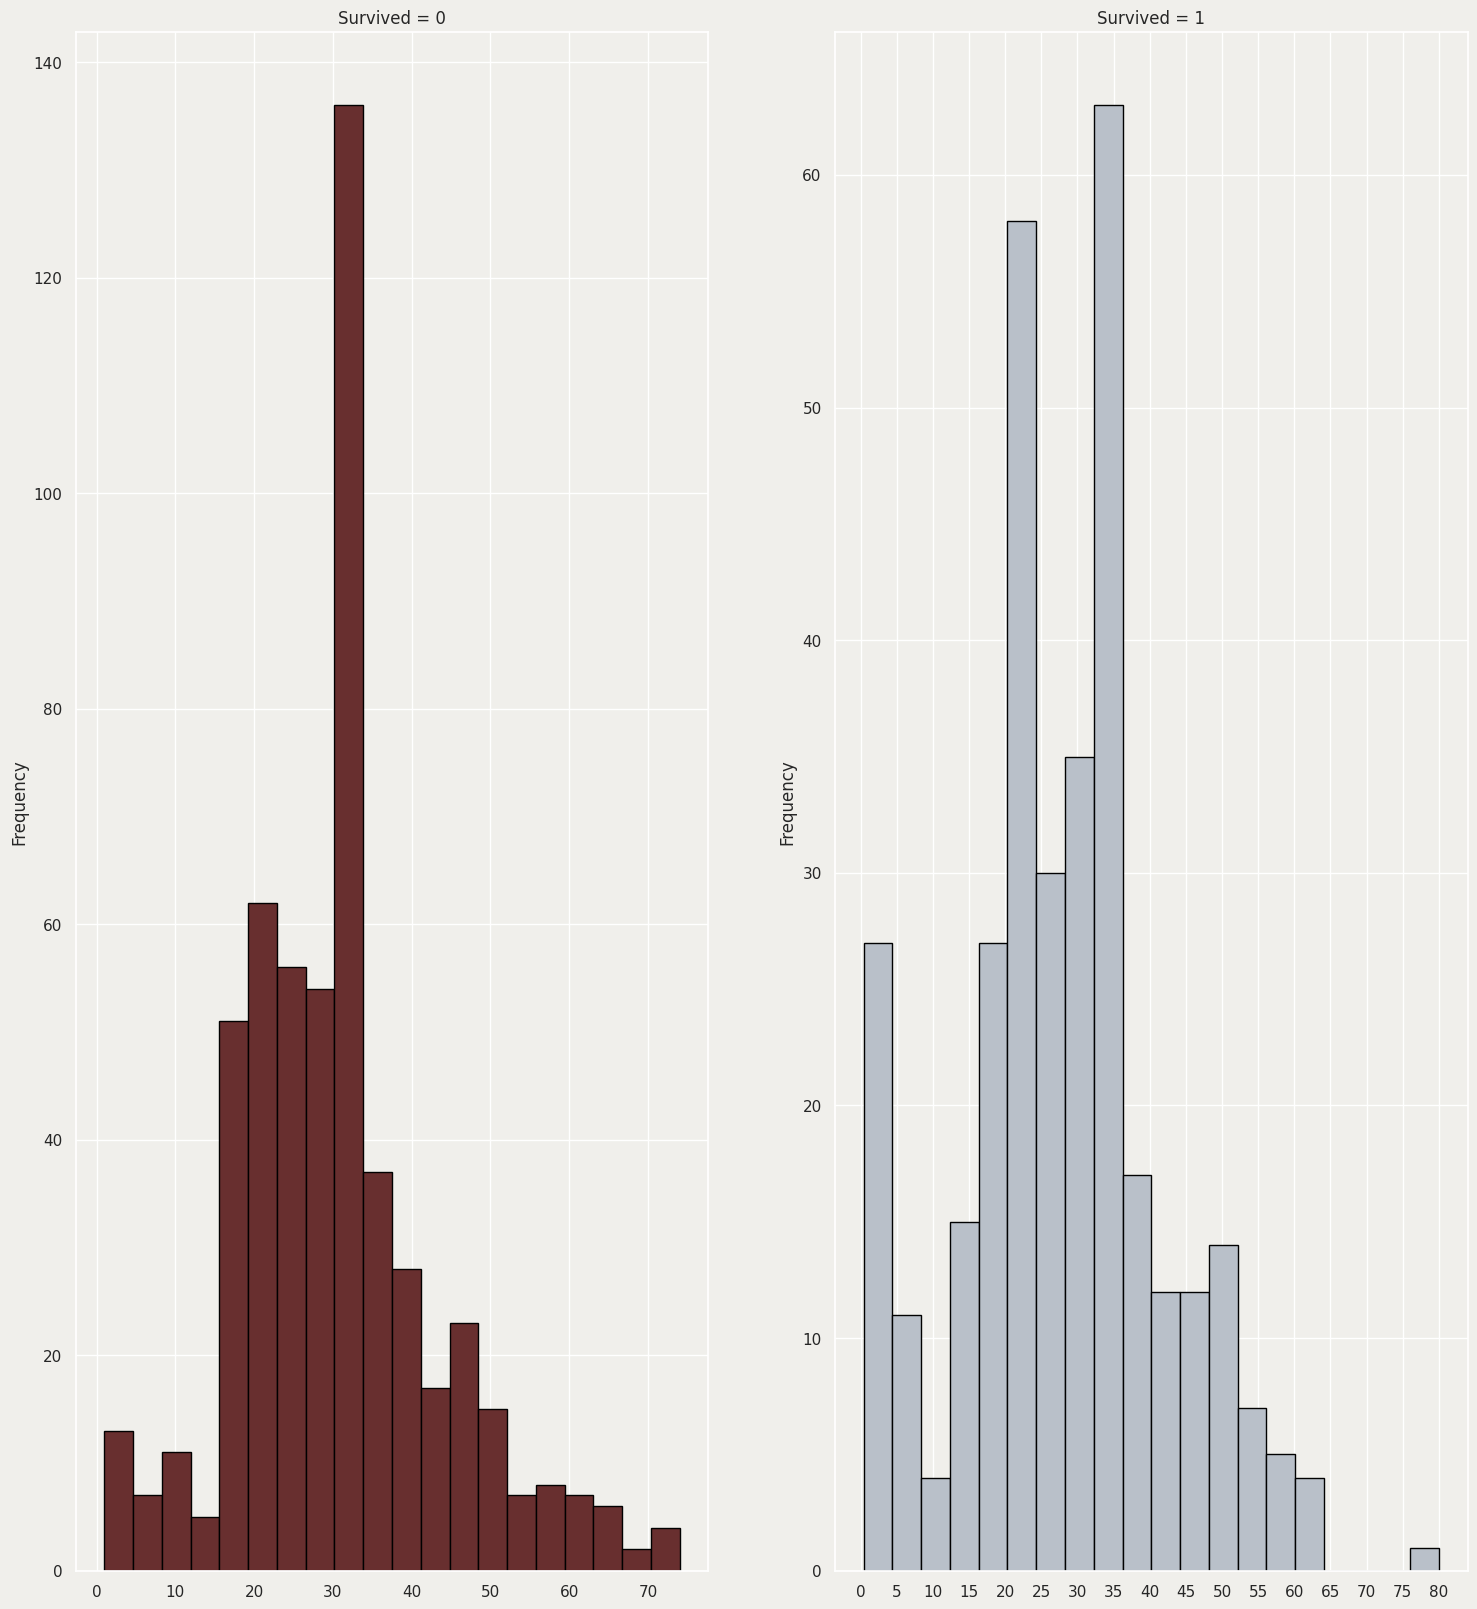

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 8))

df[df['Survived'] == 0].Age.plot.hist(bins = 20, edgecolor = 'black', color = palette[0], ax = ax[0])
ax[0].set_title('Survived = 0')

x1 = list(range(0, 85, 5))
plt.xticks(x1)

df[df['Survived'] == 1].Age.plot.hist(bins = 20, edgecolor = 'black', color = palette[1], ax = ax[1])
ax[1].set_title('Survived = 1')

x2 = list(range(0, 85, 5))
plt.xticks(x2)

* Kid below 5 years old were saved in a large numbers, thanks to the women and child first policy
* The oldest passenger were saved
* Maximum numbers of death were in the age group 30-40, where the maximum numbers of survived also comes from that group

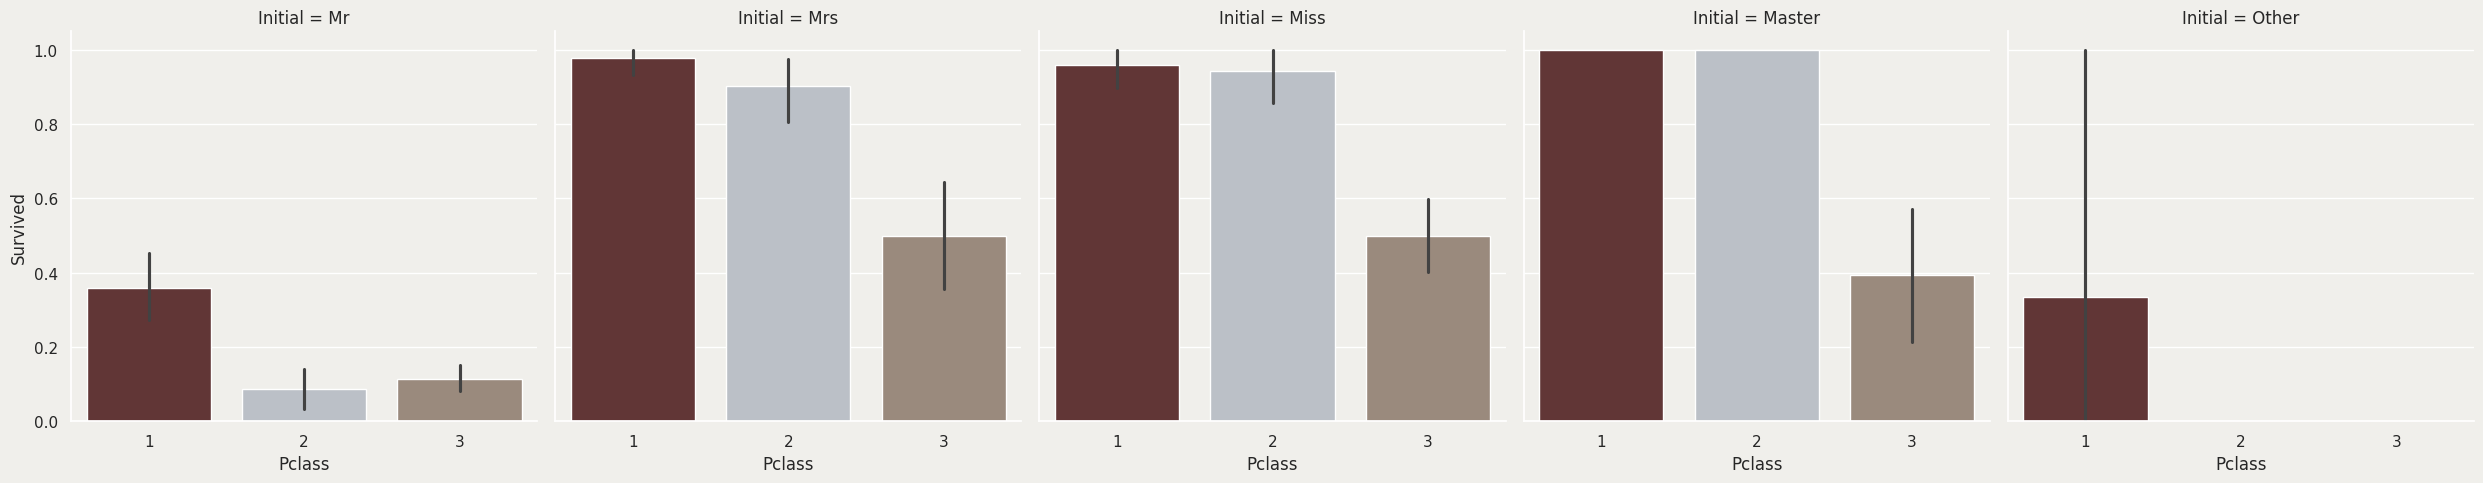

In [ ]:
sns.catplot(x = 'Pclass', y = 'Survived', col = 'Initial', data = df, kind = 'bar', palette = palette)

**Exploring the Embarked variable**

In [ ]:
pd.crosstab([df.Embarked, df.Pclass], [df.Sex, df.Survived], margins = True, ).style.background_gradient(axis = 0)

* S - Southampton
* Q - Queenstown
* C - Cherbourg

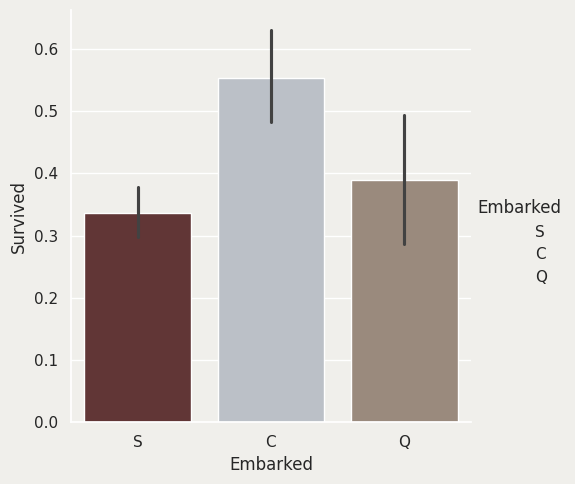

In [ ]:
sns.catplot(x = 'Embarked', y = 'Survived', data = df, palette = palette, kind = 'bar')

Text(0.5, 1.0, 'Embarked vs Pclass')

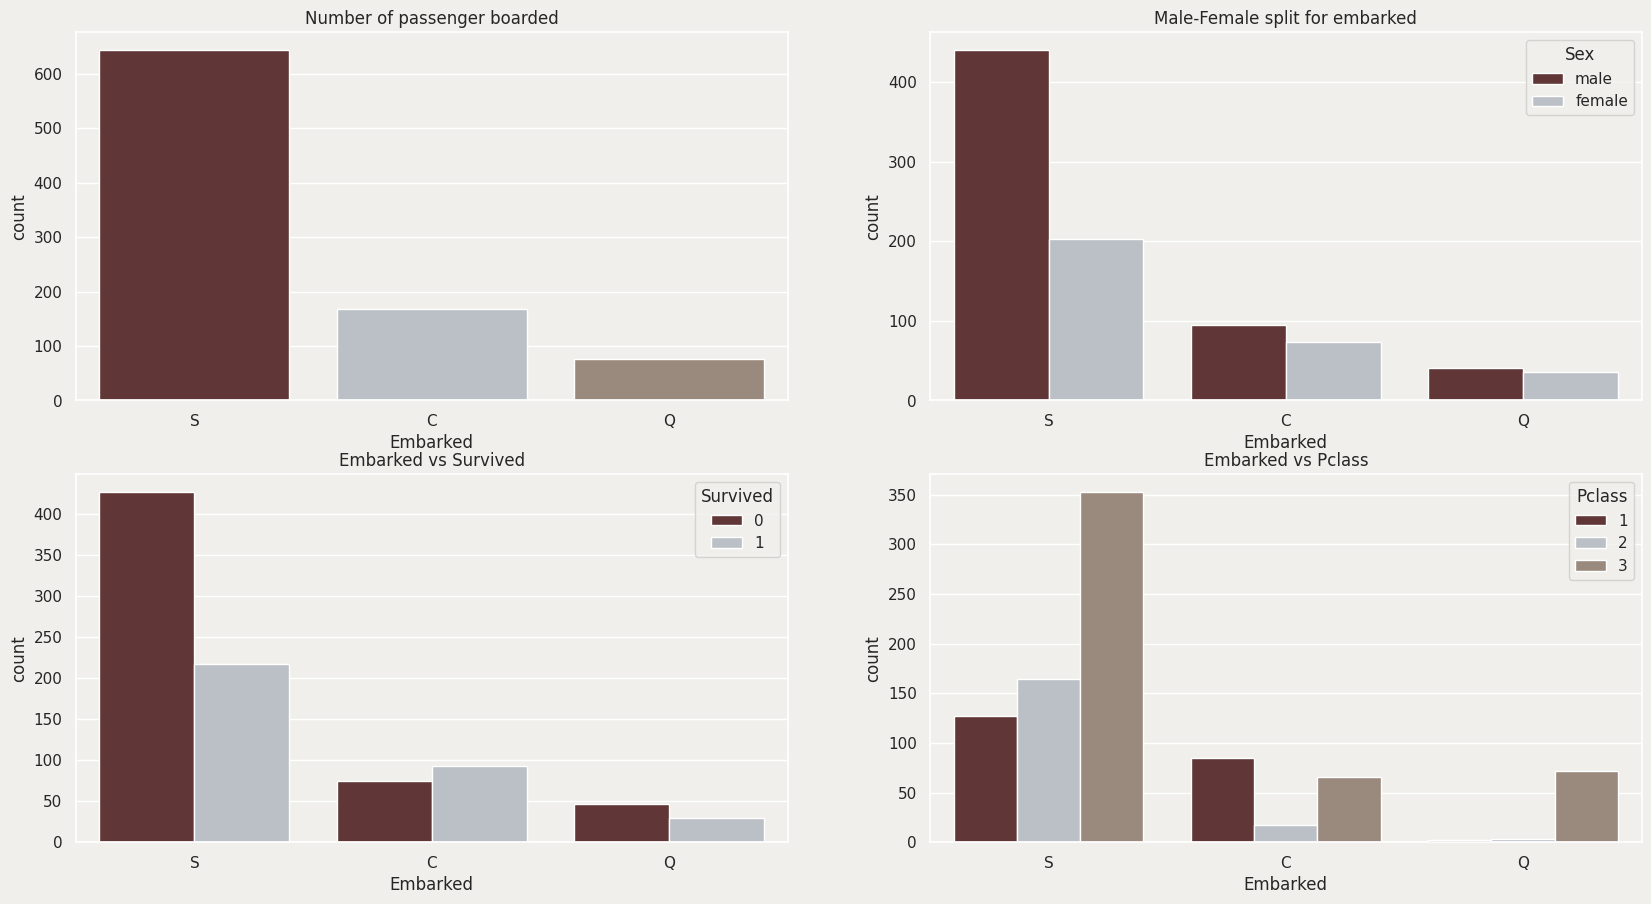

In [ ]:
f, ax = plt.subplots(2, 2, figsize = (18, 10))

sns.countplot(x = df['Embarked'], ax = ax[0, 0], palette = palette)
ax[0, 0].set_title('Number of passenger boarded')

sns.countplot(x = df['Embarked'], hue = df['Sex'], ax = ax[0, 1], palette = palette)
ax[0, 1].set_title('Male-Female split for embarked')

sns.countplot(x = df['Embarked'], hue = df['Survived'], ax = ax[1, 0], palette = palette)
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot(x = df['Embarked'], hue = df['Pclass'], ax = ax[1, 1], palette = palette)
ax[1, 1].set_title('Embarked vs Pclass')

From the above plot, we can see that:
<br />
* Majority of the passenger is embarked from S
* The passengers from C has a good proportion of survived
* Most of the passengers from C came from Pclass 1 and 2, thats maybe the reason why they have a good proportion of survived.
* Majority of passengers from S came from Pclass 3, thats why most of the passengers from S doesnt survived.
* Almost 95% passenger from S came from Pclass 3.

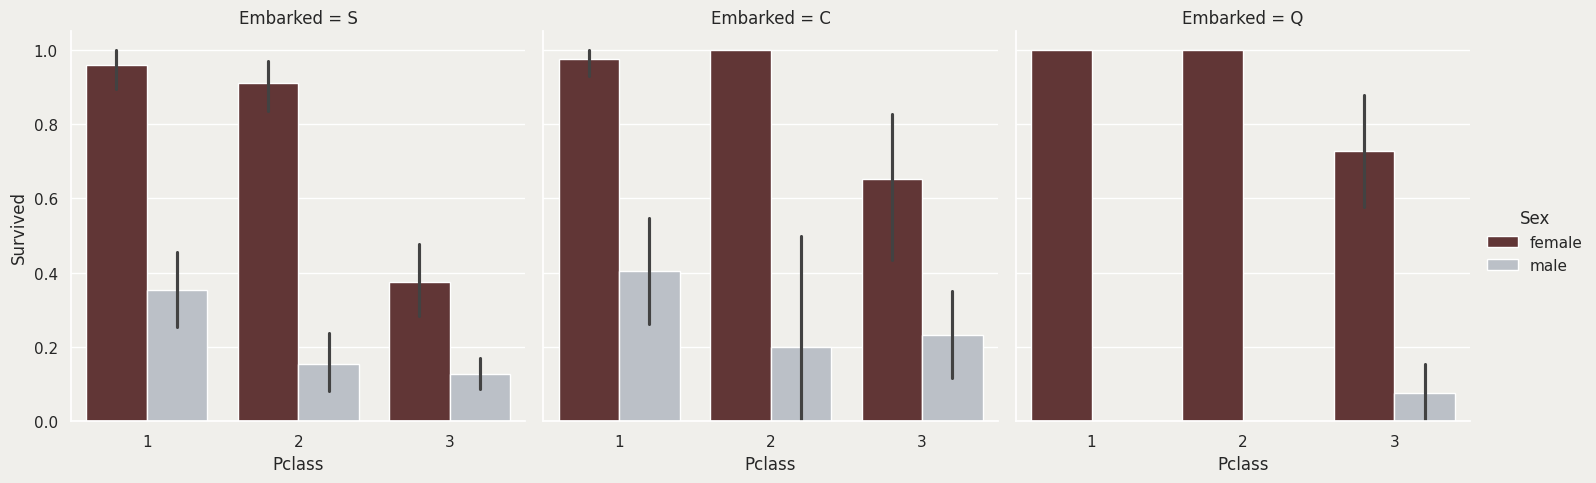

In [ ]:
sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', col = 'Embarked', data = df, kind = 'bar', palette = palette)

* The survival chances for female on every port are almost 100% for Pclass 1 and 2
* Survival rate on port S for Pclass 3 for both male and female are very low


**Filling null values on the Embarked columns**
<br />
As we see before, that majority passenger boarded from ports S, so we replace null values with S

In [ ]:
df['Embarked'].fillna('S', inplace = True)

In [ ]:
df['Embarked'].isnull().sum()

0

**Now the Embarked column is free from null values**

**Exploring the SibSp column**
<br /><br />
This feature represents whether a person is alone or with their family <br />
* Sibling = brother, sisters, ETC
* Spouse = husband, wife

In [ ]:
pd.crosstab(df.SibSp, df.Survived, margins = True).style.background_gradient(axis = 0)

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


Text(0.5, 1.0, 'SibSp vs Survived')

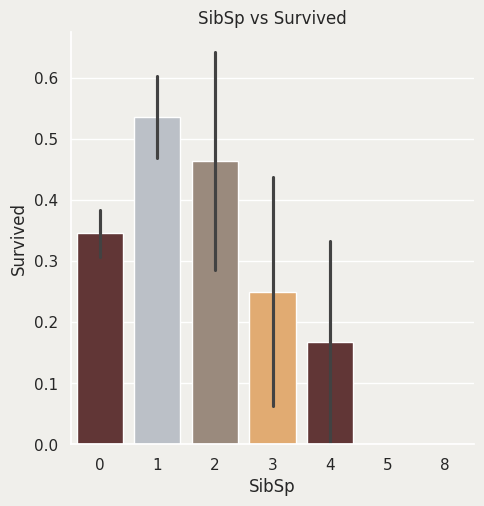

In [ ]:
sns.catplot(x = 'SibSp', y = 'Survived', data = df, palette = palette, kind = 'bar')
plt.title('SibSp vs Survived')

In [ ]:
pd.crosstab(df.SibSp, df.Pclass, margins = True).style.background_gradient(axis = 0)

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


We can see from the barplot that if a passenger is alone onboard, the survival rate is 34.5%. Then the graph will slowly decrease as the number of siblings increase. The survival rate for families with 5-8 members is 0%, the reason for that maybe Pclass.

<br />

The crosstab shows us that families with 5-8 are all comes from Pclass 3.

**Exploring the Parch variables**

In [ ]:
pd.crosstab(df.Parch, df.Survived, margins = True).style.background_gradient(axis = 0)

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


In [ ]:
pd.crosstab(df.Parch, df.Pclass, margins = True).style.background_gradient(axis = 0)

Pclass,1,2,3,All
Parch,,,,
0,163,134,381,678
1,31,32,55,118
2,21,16,43,80
3,0,2,3,5
4,1,0,3,4
5,0,0,5,5
6,0,0,1,1
All,216,184,491,891


Text(0.5, 1.0, 'Parch vs Survived')

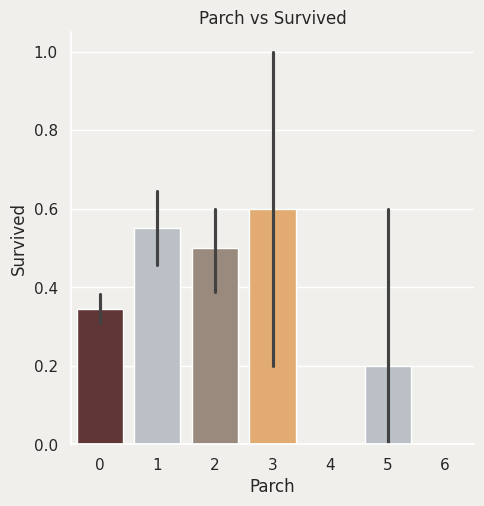

In [ ]:
sns.catplot(x = 'Parch', y = 'Survived', data = df, palette = palette, kind = 'bar')
plt.title('Parch vs Survived')

* The result is pretty similiar with the SibSp results. The passenger with their parents or children onboard have a greater rate of survival, and it reduces as the number goes up
* Being alone is proved to be fatal and the passenger with number of parents and children > 4 has low survival rate

**Exploring the fare variable**

In [ ]:
print('Highest fare: ', max(df['Fare']))
print('Lowest fare: ', min(df['Fare']))
print('Average fare: ', df['Fare'].mean())

Highest fare:  512.3292
Lowest fare:  0.0
Average fare:  32.204207968574636


**Conclusions for all features:**
* **Sex:** The survival rate for female is much higher comparing to male
* **Pclass:** As a 1st class passenger (Pclass 1), you will have a better survival rate comparing to Pclass 2 and 3. The survival rate for Pclass 3 is very low. So money wins
* **Age:** Children less than 10 years old have a high survival rate. Passenger between age group 20-35 died a lot
* **Pclass:** Customer boarding from port C have a highest survival rate even though the majority passenger from Pclass to are boarding from port S.
* **Parch and SibSp:** Having 1-2 siblings or spose, or 1-3 parents or children on board shows a greater survival rate then being alone or having a large family.

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Feature Engineering</p>

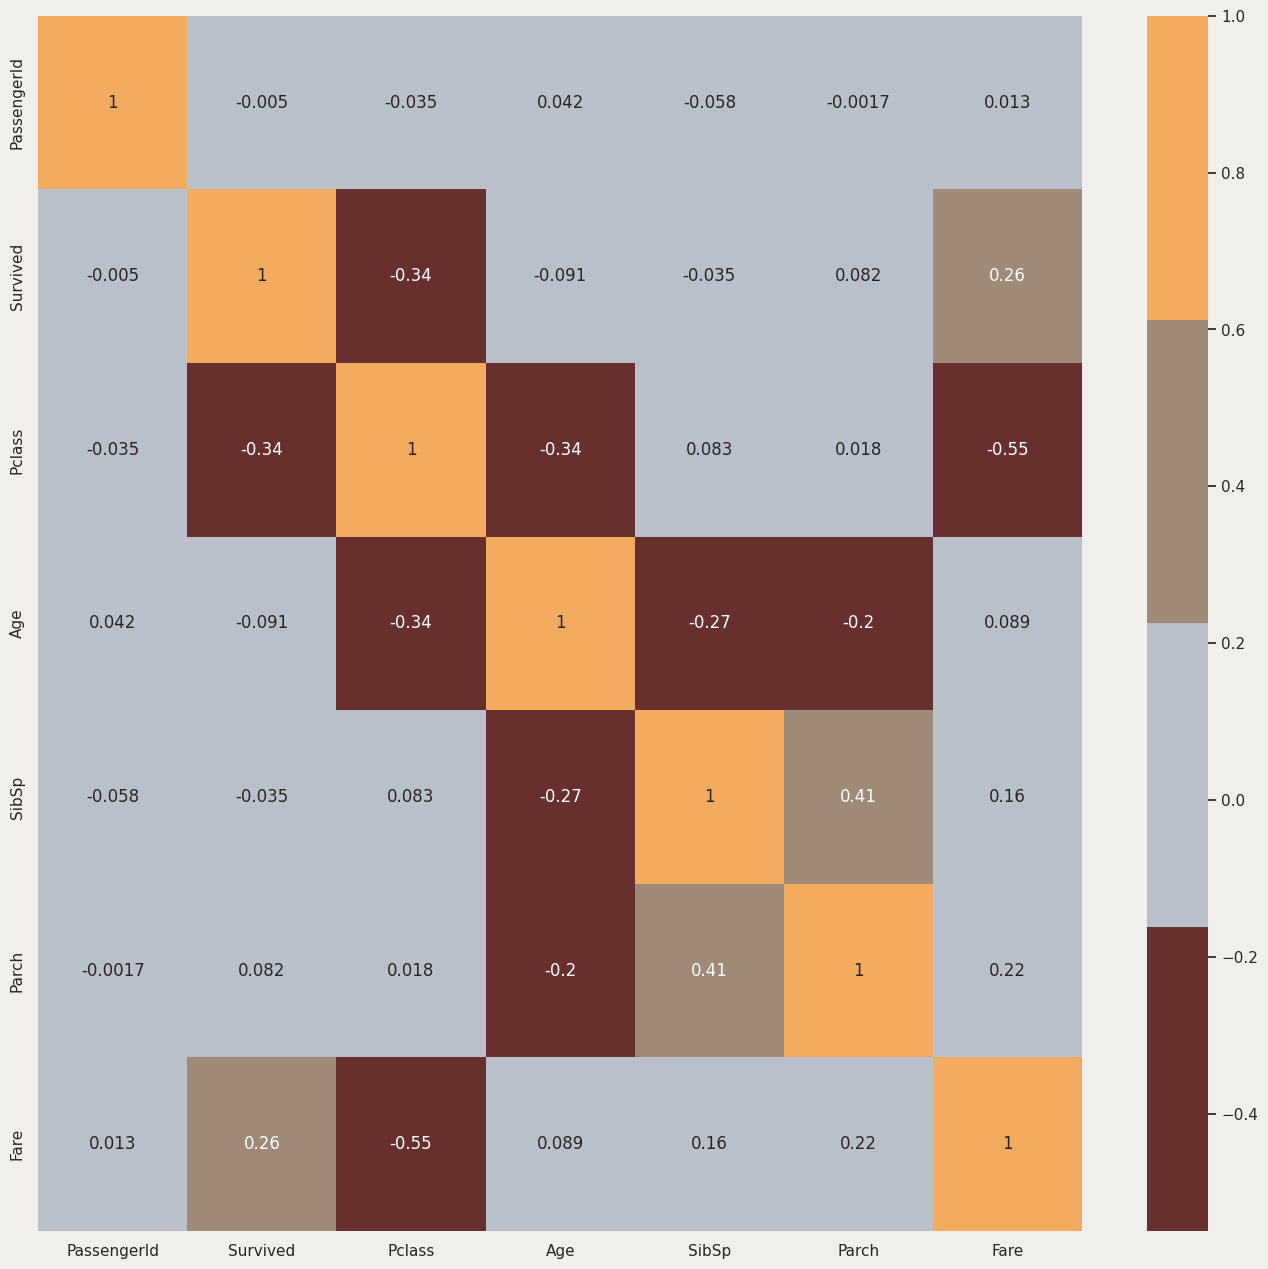

In [ ]:
from matplotlib import colors

corr = df.corr(numeric_only = True)

plt.figure(figsize = (12, 12))
sns.heatmap(corr, annot = True, cmap = colors.ListedColormap(["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]))

plt.show()

In [ ]:
df['Age_Band'] = 0

df.loc[df['Age'] <= 16, 'Age_Band'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age_Band'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age_Band'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age_Band'] = 3
df.loc[(df['Age'] > 64), 'Age_Band'] = 4

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_Band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [ ]:
df['Age_Band'].value_counts().to_frame().style.background_gradient(axis = 0)

,count
Age_Band,
1,382
2,325
0,104
3,69
4,11


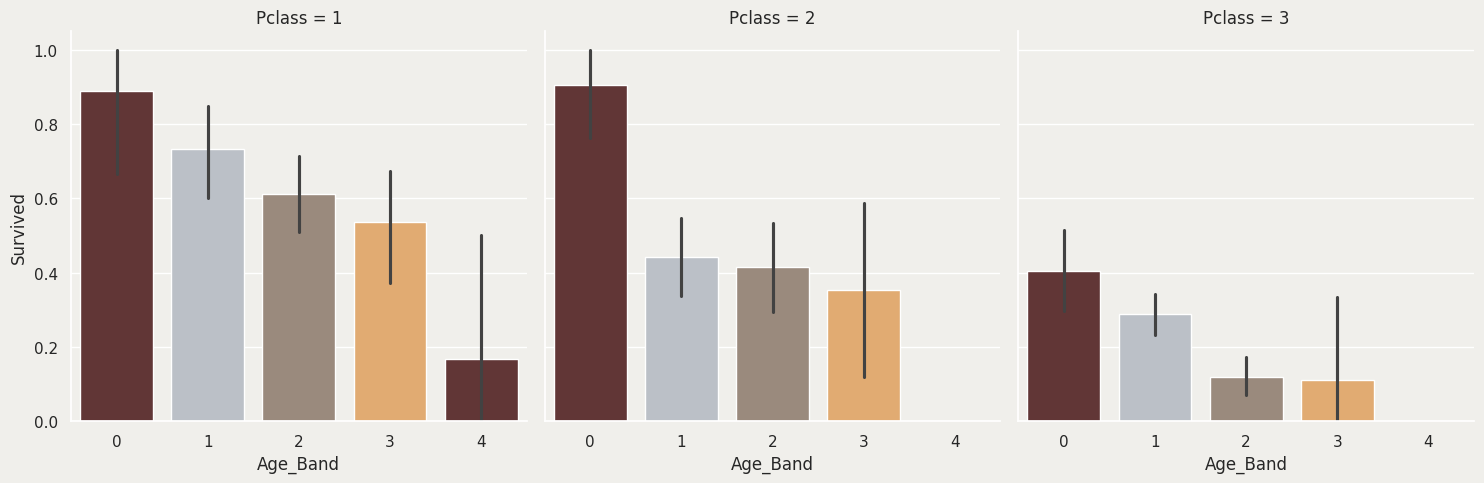

In [ ]:
sns.catplot(x = 'Age_Band', y = 'Survived', col = 'Pclass', kind = 'bar', data = df, palette = ["#682F2F","#B9C0C9", "#9F8A78", "#F3AB60"])

The survival rate decreases as the age increases

In [ ]:
df['Family_Size'] = 0
df['Family_Size'] = df['Parch'] + df['SibSp']

df['Alone'] = 0
df.loc[df['Family_Size'] == 0, 'Alone'] = 1

Text(0.5, 1.0, 'Family_Size vs Survived')

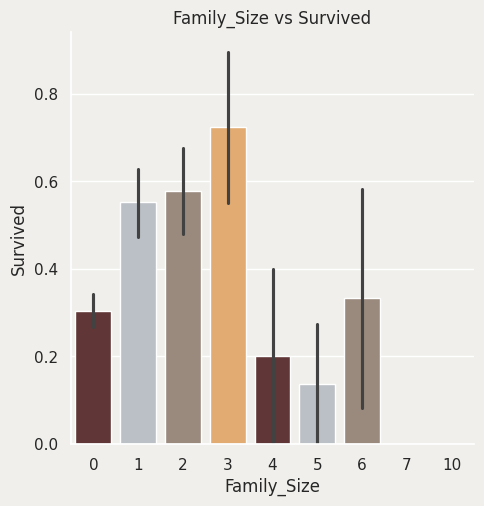

In [ ]:
sns.catplot(x = 'Family_Size', y = 'Survived', data = df, kind = 'bar', palette = ["#682F2F","#B9C0C9", "#9F8A78", "#F3AB60"])
plt.title('Family_Size vs Survived')

Text(0.5, 1.0, 'Alone vs Survived')

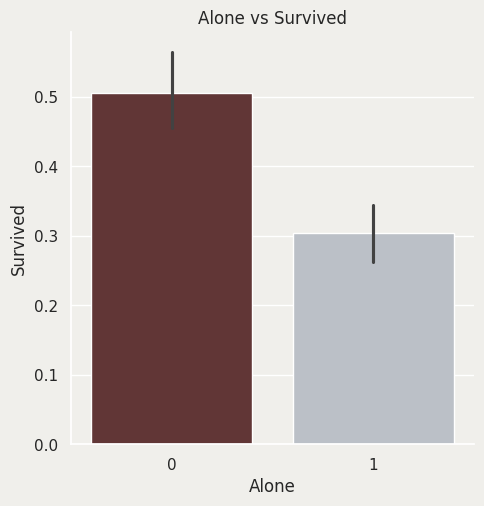

In [ ]:
sns.catplot(x = 'Alone', y = 'Survived', data = df, kind = 'bar', palette = ["#682F2F","#B9C0C9", "#9F8A78", "#F3AB60"], ax = ax[1])
plt.title('Alone vs Survived')

Clearly that if the the passenger is alone or the Family_Size = 0, the rate of survival is very low. For the Family_Size > 4, the rate decreases too.

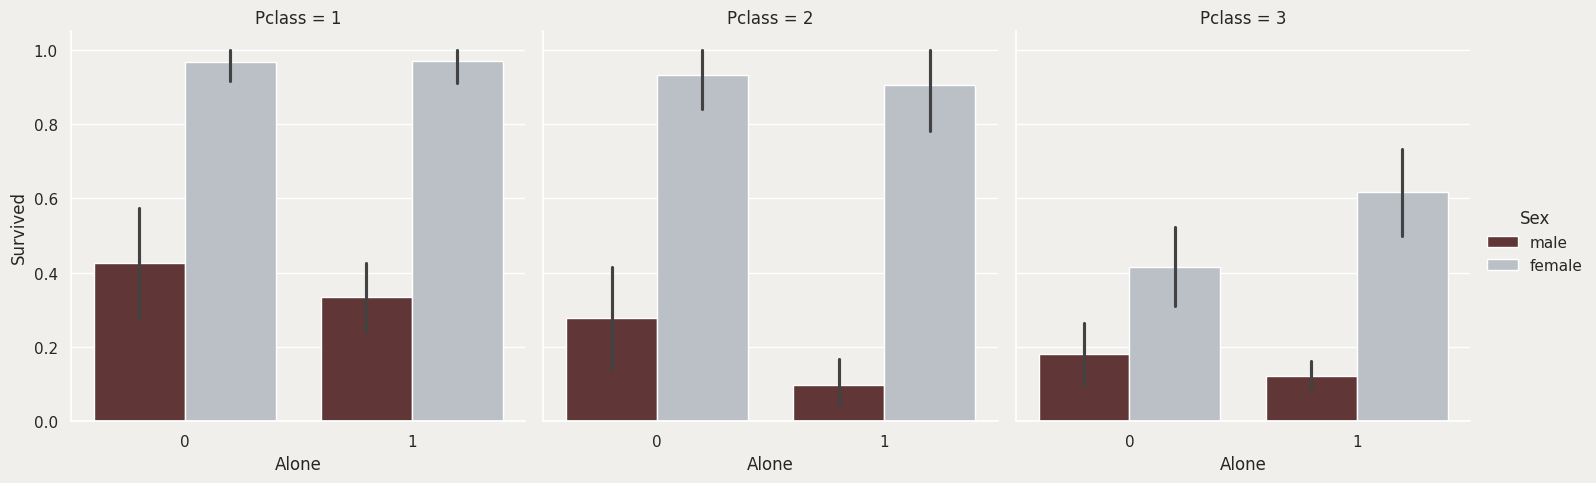

In [ ]:
sns.catplot(x = 'Alone', y = 'Survived', data = df, hue = 'Sex', col = 'Pclass', palette = ["#682F2F","#B9C0C9", "#9F8A78", "#F3AB60"], kind = 'bar')

In [ ]:
df['Fare_Range'] = pd.qcut(df['Fare'], 4)

In [ ]:
df['Fare_Range'].value_counts()

Fare_Range
(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: count, dtype: int64

In [ ]:
pd.crosstab(df.Fare_Range, df.Survived, margins = True).style.background_gradient(axis = 0)

Survived,0,1,All
Fare_Range,,,
"(-0.001, 7.91]",179,44,223
"(7.91, 14.454]",156,68,224
"(14.454, 31.0]",121,101,222
"(31.0, 512.329]",93,129,222
All,549,342,891


In [ ]:
df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(axis = 0)

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [ ]:
df['Fare_Cat'] = 0

df.loc[df['Fare'] <= 7.91, 'Fare_Cat'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare_Cat'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] < 31.0), 'Fare_Cat'] = 2
df.loc[(df['Fare'] > 31.0) & (df['Fare'] < 512.329), 'Fare_Cat'] = 3

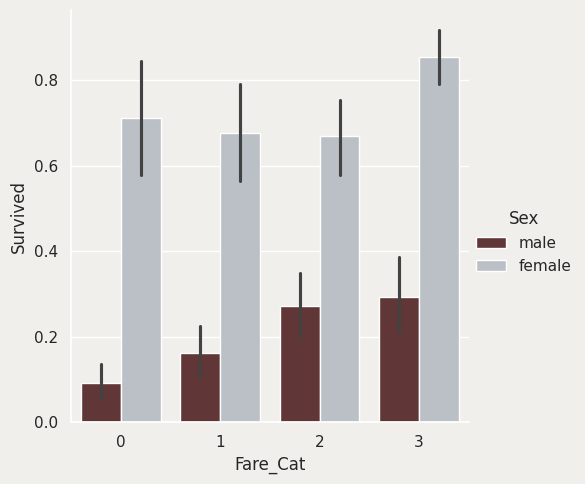

In [ ]:
sns.catplot(x = 'Fare_Cat', y = 'Survived', hue = 'Sex', data = df, palette = ["#682F2F","#B9C0C9", "#9F8A78", "#F3AB60"], kind = 'bar')

As the Fare_Cat increases, the survival rate increases

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_Band,Family_Size,Alone,Fare_Range,Fare_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]",1


<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Data Preprocessing</p>

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat = ['Sex', 'Embarked', 'Initial']

for i in cat:
  le = LabelEncoder()
  df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_Band,Family_Size,Alone,Fare_Range,Fare_Cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,3,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,3,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,2,2,0,1,"(7.91, 14.454]",1


In [ ]:
df['Initial'].value_counts()

Initial
2    529
1    186
3    127
0     40
4      9
Name: count, dtype: int64

In [ ]:
to_drop = ['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId']

df.drop(columns = to_drop, axis = 1, inplace = True)

In [ ]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_Band,Family_Size,Alone,Fare_Cat
0,0,3,1,1,0,2,2,1,1,0,0
1,1,1,0,1,0,0,3,2,1,0,3
2,1,3,0,0,0,2,1,1,0,1,1
3,1,1,0,1,0,2,3,2,1,0,3
4,0,3,1,0,0,2,2,2,0,1,1


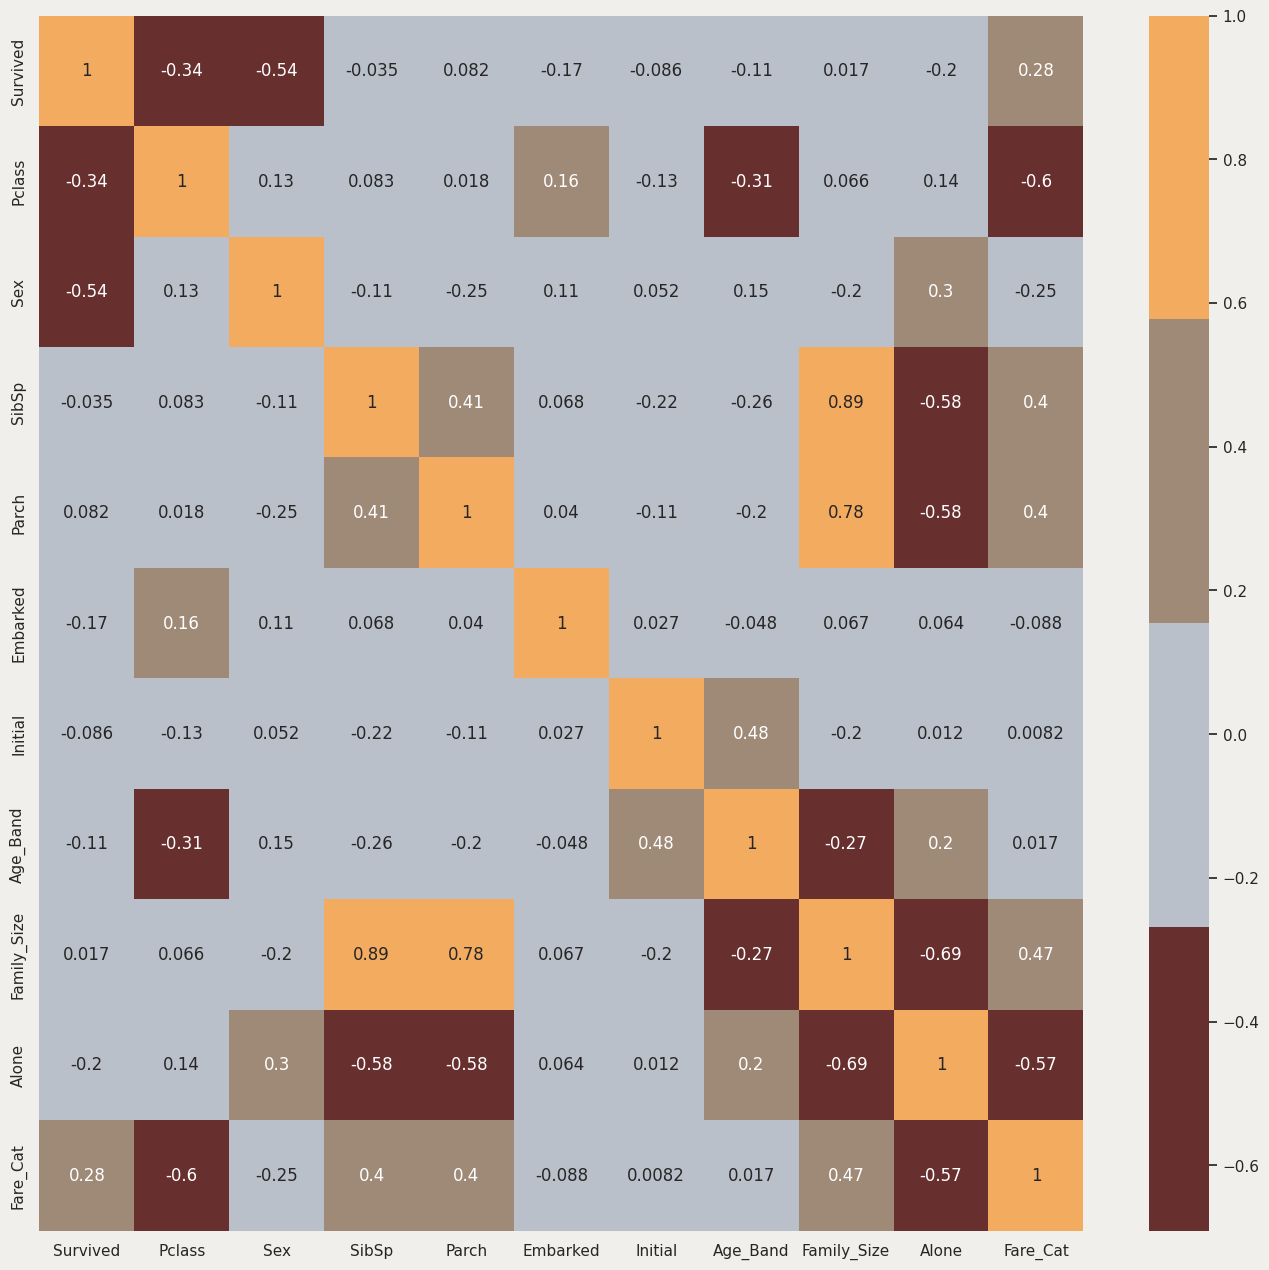

In [ ]:
corr = df.corr(numeric_only = True)

plt.figure(figsize = (12, 12))

sns.heatmap(corr, annot = True, cmap = colors.ListedColormap(["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]))

plt.show()

In [ ]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Modelling</p>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator = knn, cv = 10, param_grid = parameters)
knn_cv.fit(X_train, y_train)

print('Best hyperparameters: ', knn_cv.best_params_)
print('Accuracy: ', knn_cv.best_score_)

Best hyperparameters:  {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Accuracy:  0.8243935837245695


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(**knn_cv.best_params_)

knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

knn_score = accuracy_score(y_test, knn_y_pred)
print('KNeighborsClassifier accuracy: ', knn_score)

KNeighborsClassifier accuracy:  0.8212290502793296


In [ ]:
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators' : [50, 100, 150],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator = rf, cv = 10, param_grid = parameters)
rf_cv.fit(X_train, y_train)

print('Best hyperparameters: ', knn_cv.best_params_)
print('Accuracy: ', knn_cv.best_score_)

Best hyperparameters:  {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Accuracy:  0.8243935837245695


In [ ]:
rf = RandomForestClassifier(**rf_cv.best_params_)

rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

rf_score = accuracy_score(y_test, rf_y_pred)
print('RandomForestClassifer accuracy: ', rf_score)

RandomForestClassifer accuracy:  0.8435754189944135


In [ ]:
from sklearn.svm import SVC

parameters = {
    'kernel': ['rbf'],
    'C': [0.001, 0.005, 0.01, 0.1, 0.5, 1.0, 5, 10, 50, 100, 500, 1000],
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5, 10, 50, 100, 500, 1000, 'scale', 'auto']
}

svc = SVC()
svc_cv = GridSearchCV(estimator = svc, cv = 10, param_grid = parameters)
svc_cv.fit(X_train, y_train)

print('Best hyperparameters: ', svc_cv.best_params_)
print('Accuracy: ', svc_cv.best_score_)

Best hyperparameters:  {'C': 1000, 'gamma': 0.005, 'kernel': 'rbf'}
Accuracy:  0.8370696400625978


In [ ]:
svc = SVC(**svc_cv.best_params_)

svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)

svc_score = accuracy_score(y_test, svc_y_pred)
print('SVC accuracy: ', svc_score)

SVC accuracy:  0.8100558659217877


In [ ]:
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': list(np.arange(4, 30))
}

dt = DecisionTreeClassifier()
dt_cv = GridSearchCV(estimator = dt, cv = 10, param_grid = parameters)
dt_cv.fit(X_train, y_train)

print('Best hyperparameters: ', dt_cv.best_params_)
print('Accuracy: ', dt_cv.best_score_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
Accuracy:  0.8272691705790297


In [ ]:
dt = DecisionTreeClassifier(**dt_cv.best_params_)

dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

dt_score = accuracy_score(y_test, svc_y_pred)
print('DecisionTreeClassifier accuracy: ', dt_score)

DecisionTreeClassifier accuracy:  0.8100558659217877


<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Model Evaluation</p>

In [ ]:
result = pd.DataFrame({
    'Algorithm': ['KNeighborClassifier', 'RandomForestClassifier', 'SVC', 'DecisionTreeClassifer'],
    'Score': [knn_score, rf_score, svc_score, dt_score]
})

result.sort_values(by = 'Score', inplace = True)

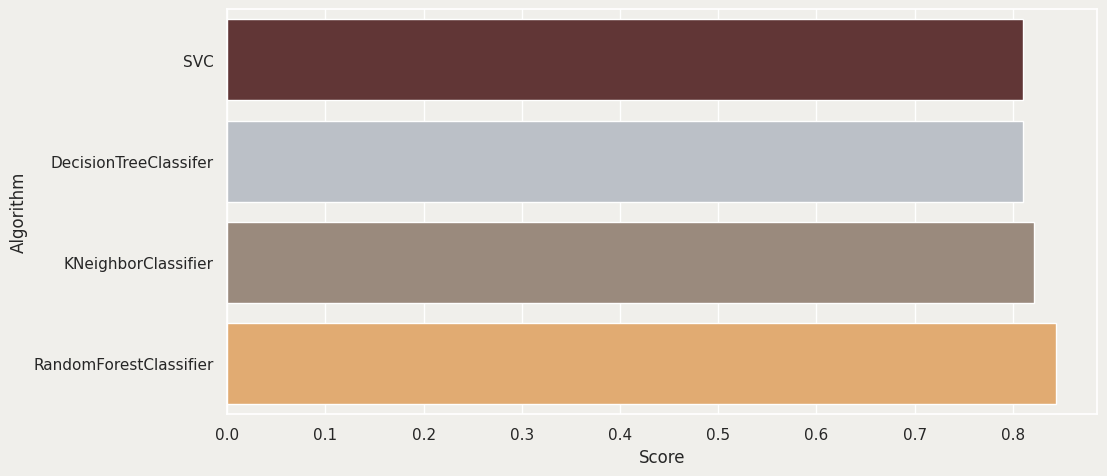

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))

sns.barplot(x = 'Score', y = 'Algorithm', data = result, palette = ["#682F2F","#B9C0C9", "#9F8A78", "#F3AB60"])

plt.show()

The RandomForestClassifier has a higher accuracy, about 0.84%. But accuracy can be sometimes missleading due to imbalance.

In [ ]:
predictions = pd.DataFrame({
    'Algorithm': ['KNeighborClassifier', 'RandomForestClassifier', 'SVC', 'DecisionTreeClassifer'],
    'Y_pred': [knn_y_pred, rf_y_pred, svc_y_pred, dt_y_pred]
})

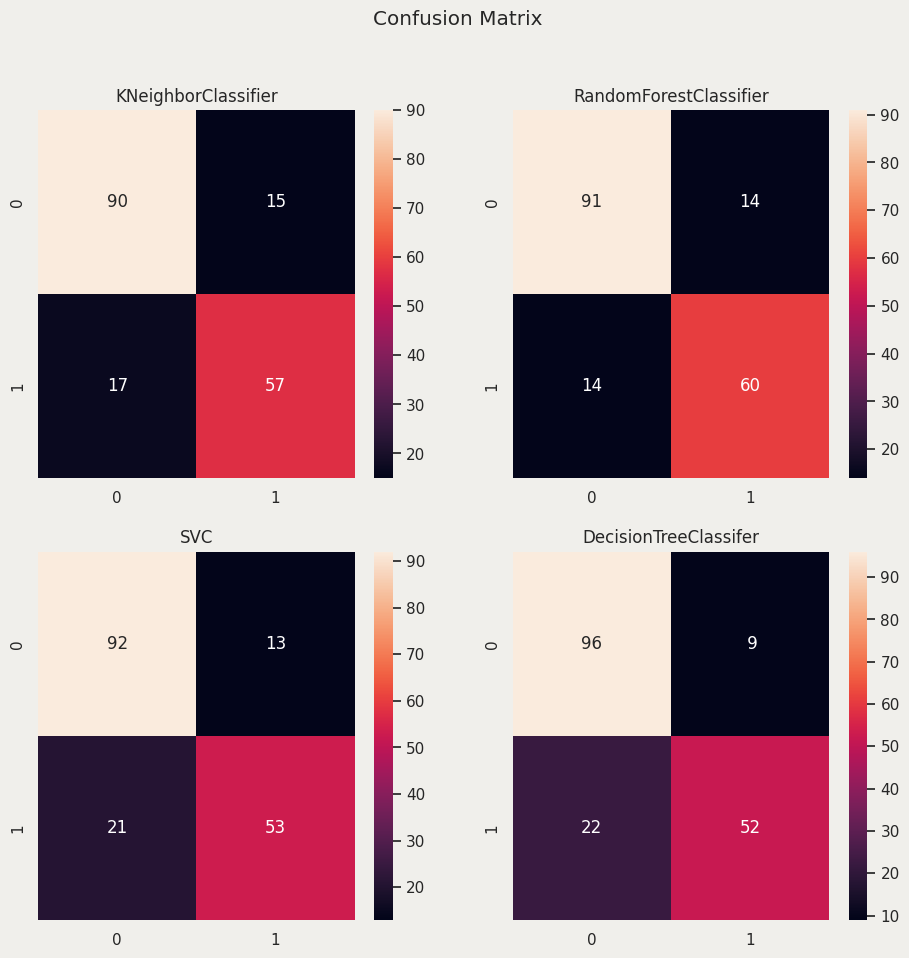

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

palette = ["#682F2F","#B9C0C9", "#9F8A78", "#F3AB60"]

for i, row in predictions.iterrows():
  ax = axes.flatten()[i]
  sns.heatmap(confusion_matrix(y_test, row['Y_pred']), ax = ax, annot = True, fmt = "2.0f")
  ax.set_title(row['Algorithm'])

plt.suptitle('Confusion Matrix')
plt.show()

By looking at the matrices, we can see that Decision Tree has a higher accuracy in correctly predicting dead passenger, while Random Forest has a higher accuracy in correctly predicting survived passenger.